In [135]:
import json
import numpy as np
import os
import sys
from matplotlib import pyplot as plt
import neuron

rootFolder = os.getcwd()
os.chdir(rootFolder)
print(rootFolder)
folder = os.listdir("WeiseEtAl2023/cells/")
folder = sorted(folder)

savedata = 1  # Save Netpyne and BBP soma_voltage

c:\Users\jacob\Documents\Work\NetPyNE\TMS_Stimulation


In [136]:
folder

['L1_NGC-DA_bNAC219_1',
 'L1_NGC-DA_bNAC219_2',
 'L1_NGC-DA_bNAC219_3',
 'L1_NGC-DA_bNAC219_4',
 'L1_NGC-DA_bNAC219_5',
 'L23_PC_cADpyr229_1',
 'L23_PC_cADpyr229_2',
 'L23_PC_cADpyr229_3',
 'L23_PC_cADpyr229_4',
 'L23_PC_cADpyr229_5',
 'L23_SBC_bNAC219_1',
 'L23_SBC_bNAC219_2',
 'L23_SBC_bNAC219_3',
 'L23_SBC_bNAC219_4',
 'L23_SBC_bNAC219_5',
 'L4_LBC_cACint209_1',
 'L4_LBC_cACint209_2',
 'L4_LBC_cACint209_3',
 'L4_LBC_cACint209_4',
 'L4_LBC_cACint209_5',
 'L4_LBC_cNAC187_1',
 'L4_LBC_cNAC187_2',
 'L4_LBC_cNAC187_3',
 'L4_LBC_cNAC187_4',
 'L4_LBC_cNAC187_5',
 'L4_MC_bNAC219_1',
 'L4_MC_bNAC219_2',
 'L4_MC_bNAC219_3',
 'L4_MC_bNAC219_4',
 'L4_MC_bNAC219_5',
 'L4_SS_cADpyr230_1',
 'L4_SS_cADpyr230_2',
 'L4_SS_cADpyr230_3',
 'L4_SS_cADpyr230_4',
 'L4_SS_cADpyr230_5',
 'L5_LBC_cNAC187_1',
 'L5_LBC_cNAC187_2',
 'L5_LBC_cNAC187_3',
 'L5_LBC_cNAC187_4',
 'L5_LBC_cNAC187_5',
 'L5_TTPC2_cADpyr232_1',
 'L5_TTPC2_cADpyr232_2',
 'L5_TTPC2_cADpyr232_3',
 'L5_TTPC2_cADpyr232_4',
 'L5_TTPC2_cADpyr232

In [137]:
def loadTemplateName(cellnumber):
    outFolder = rootFolder + "/WeiseEtAl2023/cells/" + folder[cellnumber]
    f = open(outFolder + "/template.hoc", "r")
    for line in f.readlines():
        if "begintemplate" in line:
            templatename = str(line)
    templatename = templatename[14:-1]
    return templatename

In [138]:
cellnumber = 6
cellName = folder[cellnumber]
outFolder = rootFolder + "/WeiseEtAl2023/cells/" + folder[cellnumber]
cellTemplateName = loadTemplateName(cellnumber)
print("CellNumber = %d" % cellnumber)
print("CellName = %s" % cellName)
print("TemplateName = %s" % cellTemplateName)

with open(outFolder + "/current_amps.dat") as current_file:
    current_content = current_file.read()

holding_current, step1_current, step2_current, step3_current = [
    float(x) for x in current_content.split()
]
# step1_current = step2_current
print("load step1_current from current_amps.dat = %s" % current_content)

CellNumber = 6
CellName = L23_PC_cADpyr229_2
TemplateName = cADpyr229_L23_PC_8ef1aa6602
load step1_current from current_amps.dat = -0.067261 0.1692192 0.1833208 0.1974224


In [139]:
cellnumber = 15
cellName = folder[cellnumber]
outFolder = rootFolder + "/WeiseEtAl2023/cells/" + folder[cellnumber]
cellTemplateName = loadTemplateName(cellnumber)
print("CellNumber = %d" % cellnumber)
print("CellName = %s" % cellName)
print("TemplateName = %s" % cellTemplateName)

with open(outFolder + "/current_amps.dat") as current_file:
    current_content = current_file.read()

holding_current, step1_current, step2_current, step3_current = [
    float(x) for x in current_content.split()
]
# step1_current = step2_current
print("load step1_current from current_amps.dat = %s" % current_content)

CellNumber = 15
CellName = L4_LBC_cACint209_1
TemplateName = cACint209_L4_LBC_baa757490e
load step1_current from current_amps.dat = -0.031738 0.0630936 0.0683514 0.0736092


In [140]:
step1_current = holding_current + step1_current / 1.25
step1_current

0.018736879999999997

In [141]:
os.chdir(rootFolder)
!nrnivmodl WeiseEtAl2023/mechanisms/


There was an error in the process of creating nrnmech.dll


The syntax of the command is incorrect.
ls: cannot access '*.[mM][oO][dD]': No such file or directory


In [142]:
from netpyne import sim, specs
import pickle

cfg = specs.SimConfig()

cfg.duration = 320  ## Duration of the sim, in ms
cfg.dt = 0.05
cfg.seeds = {"conn": 4321, "stim": 1234, "loc": 4321}
cfg.hParams = {"celsius": 34, "v_init": -70}
cfg.verbose = False
cfg.createNEURONObj = True
cfg.createPyStruct = True
cfg.cvode_active = False
cfg.cvode_atol = 1e-6
cfg.cache_efficient = True
cfg.printRunTime = 0.5

cfg.includeParamsLabel = False
cfg.printPopAvgRates = True
cfg.checkErrors = False

allpops = ["L23_PC"]  # , 'L5_TTPC']

cfg.recordCells = allpops  # which cells to record from
cfg.recordTraces = {
    "V_soma": {"sec": "soma_0", "loc": 0.5, "var": "v"},
    "V_axon_0": {"sec": "axon_0", "loc": 0.5, "var": "v"},
    "V_axon_10": {"sec": "axon_10", "loc": 0.5, "var": "v"},
    # 'V_apic_0': {'sec':'apic_0', 'loc':0.5, 'var':'v'},
    "V_apic_3": {"sec": "apic_3", "loc": 0.5, "var": "v"},
    "V_apic_13": {"sec": "apic_13", "loc": 0.5, "var": "v"},
    # 'V_apic_100': {'sec':'apic_100', 'loc':0.5, 'var':'v'},
    # 'V_dend_8_1': {'sec':'dend_8', 'loc':0.1, 'var':'v'},
    # 'V_dend_8_3': {'sec':'dend_8', 'loc':0.3, 'var':'v'},
    # 'V_dend_8_5': {'sec':'dend_8', 'loc':0.5, 'var':'v'},
    # 'V_dend_8_7': {'sec':'dend_8', 'loc':0.7, 'var':'v'},
    # 'V_dend_8_9': {'sec':'dend_8', 'loc':0.9, 'var':'v'},
    "V_dend_5": {"sec": "dend_5", "loc": 0.5, "var": "v"},
    "V_dend_25": {"sec": "dend_25", "loc": 0.5, "var": "v"},
    # 'V_dend_70': {'sec':'dend_70', 'loc':0.5, 'var':'v'},
}


## Dict with traces to record
cfg.recordStim = True
cfg.recordTime = True
cfg.recordStep = 0.05


# cfg.recordLFP = [[0, y, 0] for y in [-400]] # 1 elec on skull


cfg.simLabel = "S1_Net"
cfg.saveFolder = "."
cfg.savePickle = False  ## Save pkl file
cfg.saveJson = False  ## Save json file
cfg.saveDataInclude = [
    "simConfig",
    "netParams",
]  ## 'simData' , 'simConfig', 'netParams'
cfg.backupCfgFile = None  ##
cfg.gatherOnlySimData = False  ##
cfg.saveCellSecs = True  ##
cfg.saveCellConns = False  ##

cfg.analysis["plotTraces"] = {
    "include": ["L23_PC"],
    "figSize": (12, 4),
    "timeRange": [180, cfg.duration],
    "saveFig": False,
    "overlay": True,
    "oneFigPer": "cell",
}  # Plot recorded traces for this list of cells
# ,'L5_TTPC']

# ------------------------------------------------------------------------------
# Current inputs
# ------------------------------------------------------------------------------
cfg.addIClamp = 1

cfg.IClamp1 = {
    "pop": "L23_PC",
    "sec": "soma_0",
    "loc": 0.5,
    "start": 1000,
    "dur": 1000,
    "amp": step1_current,
}
# cfg.IClamp2 = {'pop': 'L5_TTPC', 'sec': 'apic_98', 'loc': 0.5, 'start': 700, 'dur': 25, 'amp': step1_current}
# cfg.IClamp3 = {'pop': 'L5_TTPC', 'sec': 'apic_99', 'loc': 0.5, 'start': 900, 'dur': 25, 'amp': step1_current}
# cfg.IClamp4 = {'pop': 'L5_TTPC', 'sec': 'apic_100', 'loc': 0.5, 'start': 1100, 'dur': 25, 'amp': step1_current}

In [143]:
# ------------------------------------------------------------------------------
#
# NETWORK PARAMETERS
#
# ------------------------------------------------------------------------------
netParams = (
    specs.NetParams()
)  # object of class NetParams to store the network parameters
# ------------------------------------------------------------------------------
# General network parameters
# ------------------------------------------------------------------------------
cfg.scale = 1.0  # reduce size
cfg.sizeY = 2082.0
cfg.sizeX = 420.0  # r = 210 um
cfg.sizeZ = 420.0

netParams.scale = cfg.scale  # Scale factor for number of cells
netParams.sizeX = cfg.sizeX  # x-dimension (horizontal length) size in um
netParams.sizeY = (
    cfg.sizeY
)  # y-dimension (vertical height or cortical depth) size in um
netParams.sizeZ = cfg.sizeZ  # z-dimension (horizontal depth) size in um
netParams.shape = "cylinder"  # cylindrical (column-like) volume

# Layer	height (um)	height (norma)	from	to
# L1	165		    0.079		    0.000	0.079
# L2	149		    0.072		    0.079	0.151
# L3	353		    0.170		    0.151	0.320
# L4	190		    0.091		    0.320	0.412
# L5	525		    0.252		    0.412	0.664
# L6	700		    0.336		    0.664	1.000
# L23	502		    0.241		    0.079	0.320
# All	2082	    1.000


cellModels = ["HH_full"]

layer = {
    "1": [0.0, 0.079],
    "2": [0.079, 0.151],
    "3": [0.151, 0.320],
    "23": [0.079, 0.320],
    "4": [0.320, 0.412],
    "5": [0.412, 0.664],
    "6": [0.664, 1.0],
    "longS1": [2.2, 2.3],
    "longS2": [2.3, 2.4],
}  # normalized layer boundaries

# ------------------------------------------------------------------------------
# Cell parameters
# ------------------------------------------------------------------------------

os.chdir(rootFolder)

cellnumber = 6
cellName = "L23_PC"
# cellTemplateName = loadTemplateName(cellnumber)
cellRule = netParams.importCellParams(
    label=cellName + "_rule",
    somaAtOrigin=False,
    conds={"cellType": cellName, "cellModel": "HH_full"},
    fileName="cellwrapper3.py",
    cellName="loadCell_Net_adv",
    cellInstance=True,
    cellArgs={"cellName": cellName, "id": 1},
)

os.chdir(rootFolder)

"""cellnumber = 15
cellName = 'L5_TTPC2'
#cellTemplateName = loadTemplateName(cellnumber)
cellRule = netParams.importCellParams(label=cellName + '_rule', somaAtOrigin=False,
    conds={'cellType': cellName, 'cellModel': 'HH_full'},
    fileName='cellwrapper3.py',
    cellName='loadCell_Net_adv',
    cellInstance = True,
    cellArgs={'cellName': cellName, 'id': 1})

os.chdir(rootFolder)"""

L23_PC


"cellnumber = 15\ncellName = 'L5_TTPC2'\n#cellTemplateName = loadTemplateName(cellnumber)\ncellRule = netParams.importCellParams(label=cellName + '_rule', somaAtOrigin=False,\n    conds={'cellType': cellName, 'cellModel': 'HH_full'},\n    fileName='cellwrapper3.py',\n    cellName='loadCell_Net_adv',\n    cellInstance = True,\n    cellArgs={'cellName': cellName, 'id': 1})\n\nos.chdir(rootFolder)"

In [144]:
# ------------------------------------------------------------------------------
# Population parameters
# ------------------------------------------------------------------------------

cellnumber = 6
cellName = folder[cellnumber]
pyr_positions = [[x, 357, 210] for x in range(0, 1382, 2500)]
cellsList = [{"x": x, "y": y, "z": z} for x, y, z in pyr_positions]
netParams.popParams["L23_PC"] = {
    "cellType": "L23_PC",
    "cellModel": "HH_full",
    "cellsList": cellsList,
}


"""cellnumber = 15 
cellName = folder[cellnumber]
pyr_positions = [[x , 857 , 210] for x in range(420,1382,2500)]
cellsList = [{'x': x, 'y': y, 'z': z} for x,y,z in pyr_positions]
netParams.popParams['L5_TTPC'] = {'cellType': 'L5_TTPC', 'cellModel': 'HH_full', 'cellsList': cellsList} """


# #------------------------------------------------------------------------------
# #  extracellular mechs
# #------------------------------------------------------------------------------
for celltyp in netParams.cellParams.keys():
    label = []
    for secname in netParams.cellParams[celltyp]["secs"].keys():
        netParams.cellParams[celltyp]["secs"][secname]["mechs"]["extracellular"] = {}

# ------------------------------------------------------------------------------
# Current inputs (IClamp)
# ------------------------------------------------------------------------------
if cfg.addIClamp:
    for key in [k for k in dir(cfg) if k.startswith("IClamp")]:
        params = getattr(cfg, key, None)
        [pop, sec, loc, start, dur, amp] = [
            params[s] for s in ["pop", "sec", "loc", "start", "dur", "amp"]
        ]

        # cfg.analysis['plotTraces']['include'].append((pop,0))  # record that pop

        # add stim source
        netParams.stimSourceParams[key] = {
            "type": "IClamp",
            "delay": start,
            "dur": dur,
            "amp": amp,
        }

        # connect stim source to target
        netParams.stimTargetParams[key + "_" + pop] = {
            "source": key,
            "conds": {"pop": pop},
            "sec": sec,
            "loc": loc,
        }


netParams.rotateCellsRandomly = True
# sim.createSimulateAnalyze(netParams, cfg)

In [145]:
sim.initialize(
    simConfig=cfg, netParams=netParams
)  # create network object and set cfg and net params
sim.net.createPops()  # instantiate network populations
sim.net.createCells()  # instantiate network cells based on defined populations
sim.net.defineCellShapes()  # in case some cells had stylized morphologies without 3d pts
sim.net.connectCells()  # create connections between cells based on params
sim.net.addStims()  # add network stimulation
sim.setupRecording()  # setup variables to record for each cell (spikes, V traces, etc)


Start time:  2024-06-24 12:14:28.610126

Creating network of 1 cell populations on 1 hosts...
  Number of cells on node 0: 1 
  Done; cell creation time = 0.06 s.
Making connections...
  Number of connections on node 0: 0 
  Done; cell connection time = 0.00 s.
Adding stims...
  Number of stims on node 0: 0 
  Done; cell stims creation time = 0.00 s.


KeyError: 'L5_TTPC'

In [ ]:
# for sec in netParams.cellParams[celltyp]['secLists']['all']:
#     if netParams.cellParams[celltyp]['secs'][sec]['geom']['nseg']>1:
#         print(sec,netParams.cellParams[celltyp]['secs'][sec]['geom']['nseg'],np.shape(netParams.cellParams[celltyp]['secs'][sec]['geom']['pt3d']))

In [ ]:
def collect_pt3d(self, section):
    """collect the pt3d info, for each section"""
    n3dsec = 0
    r3dsec = np.zeros(3)
    for sec in [sec for secName, sec in self.secs.items() if section in secName]:
        sec["hObj"].push()
        n3d = int(neuron.h.n3d())  # get number of n3d points in each section
        # print("get number of n3d points in each section",n3d)
        r3d = np.zeros(
            (3, n3d)
        )  # to hold locations of 3D morphology for the current section
        n3dsec += n3d

        for i in range(n3d):
            r3dsec[0] += neuron.h.x3d(i)
            r3dsec[1] += neuron.h.y3d(i)
            r3dsec[2] += neuron.h.z3d(i)

        neuron.h.pop_section()

    r3dsec /= n3dsec

    return r3dsec


def getSecsPos(self, secList):
    """Get Secs position"""
    x3d, y3d, z3d = [], [], []

    for secName in secList:
        # print(secName)
        r3dsec = collect_pt3d(self, secName)
        print(secName, r3dsec)

        x3d.append(r3dsec[0])
        y3d.append(r3dsec[1])
        z3d.append(r3dsec[2])

    return x3d, y3d, z3d


def insert_v_ext(self, v_ext, t_ext):
    self.t_ext = neuron.h.Vector(t_ext)
    self.v_ext = []
    for v in v_ext:
        self.v_ext.append(neuron.h.Vector(v))

    # play v_ext into e_extracellular reference
    i = 0
    for secName, sec in self.secs.items():
        # print(secName,i)
        for seg in sec["hObj"]:
            self.v_ext[i].play(seg._ref_e_extracellular, self.t_ext)
        i += 1


def make_extracellular_stimuli(acs_params, cell, secList):
    """Function to calculate and apply external potential"""
    x0, y0, z0 = acs_params["position"]
    ext_field = np.vectorize(
        lambda x, y, z: 1
        / (
            4
            * np.pi
            * (
                acs_params["sigma"]
                * np.sqrt((x0 - x) ** 2 + (y0 - y) ** 2 + (z0 - z) ** 2)
                + skull_attenuation
            )
        )
    )

    stimstart = acs_params["stimstart"]
    stimend = acs_params["stimend"]
    stimdif = stimend - stimstart

    # MAKING THE EXTERNAL FIELD
    n_tsteps = int(stimdif / cfg.dt + 1)
    n_start = int(stimstart / cfg.dt)
    n_end = int(stimend / cfg.dt + 1)
    t = np.arange(start=n_start, stop=n_end) * cfg.dt
    pulse = (
        acs_params["amp"]
        * 1000.0
        * np.sin(2 * np.pi * acs_params["frequency"] * t / 1000)
    )

    totnsegs = len(secList)
    v_cell_ext = np.zeros((totnsegs, n_tsteps))
    secsPos = getSecsPos(cell, secList)
    print(cell, secsPos)
    v_cell_ext[:, :] = ext_field(
        secsPos[0], -1 * np.array(secsPos[1]), secsPos[2]
    ).reshape(totnsegs, 1) * pulse.reshape(1, n_tsteps)

    insert_v_ext(cell, v_cell_ext, t)

    return v_cell_ext, cell


# The parameters of the extracellular point current source
acs_params = {
    "position": [210.0, -1710.0, 210.0],  # um # y = [pia, bone]
    "amp": 400.0,  # uA,
    "stimstart": 200,  # ms
    "stimend": 300,  # ms
    "frequency": 20,  # Hz
    "sigma": 0.57,  # decay constant S/m
}

skull_attenuation = 0.01 * 710  # conductivity of bone(S/m) * thickness of rat skull um

# Add extracellular stim
for c, metype in enumerate(sim.net.cells):
    if "presyn" not in metype.tags["pop"]:
        print("\n", metype.tags)
        secList = [
            secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]["geom"]
        ]
        # print(secList)
        v_cell_ext, cell = make_extracellular_stimuli(acs_params, metype, secList)


sim.runSim()  # run parallel Neuron simulation
sim.gatherData()  # gather spiking data and cell info from each node
sim.saveData()  # save params, cell info and sim output to file (pickle,mat,txt,etc)#
sim.analysis.plotData()  # plot spike raster etc
sim.analysis.plotShape()


 {'cellType': 'L23_PC', 'cellModel': 'HH_full', 'pop': 'L23_PC', 'x': 0, 'y': 357, 'z': 210, 'xnorm': 0.0, 'ynorm': 0.17146974063400577, 'znorm': 0.5}
soma_0 [ 2.81374310e-01 -3.57000000e+02  2.09514582e+02]
axon_0 [  21.99740738 -360.01752387  235.16660648]
dend_0 [-3.29062462e-01 -3.57521935e+02  2.13010651e+02]
dend_1 [ -71.53873494 -362.58767461  295.28258972]
dend_2 [ -14.30921559 -384.67335601  296.44325934]
dend_3 [  89.72632818 -297.19385793  193.36371485]
dend_4 [  14.90112998 -344.32555922  219.89507288]
dend_5 [  -9.25610933 -366.32178876  222.24663988]
dend_6 [  67.5985353  -391.63752515  173.69465649]
dend_7 [ -22.20496893 -341.48190689  236.26578712]
dend_8 [ -10.35516739 -347.15848592  328.55670827]
dend_9 [ -65.71900662 -323.22533918  303.3160662 ]
dend_10 [-122.97891083 -304.14108887  357.49452515]
dend_11 [-128.19858274 -298.98748502  359.30444613]
dend_12 [ -32.07762408 -351.67750931  233.89856148]
dend_13 [ -46.48033157 -353.33872192  281.52390076]
dend_14 [ -54.08

ValueError: cannot call `vectorize` on size 0 inputs unless `otypes` is set

(417, 2001)


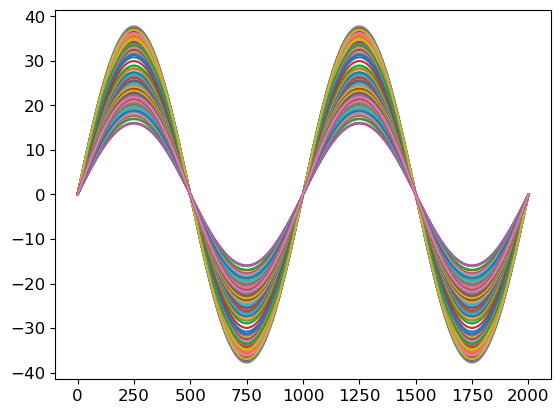

In [ ]:
print(np.shape(v_cell_ext))
for v in v_cell_ext:
    plt.plot(v)


 {'cellType': 'L23_PC_cADpyr229_2', 'cellModel': 'HH_full', 'pop': 'L23_PC', 'x': 0, 'y': 357, 'z': 210, 'xnorm': 0.0, 'ynorm': 0.17146974063400577, 'znorm': 0.5}

 {'cellType': 'L5_TTPC2_cADpyr232_1', 'cellModel': 'HH_full', 'pop': 'L5_TTPC', 'x': 420, 'y': 857, 'z': 210, 'xnorm': 1.0, 'ynorm': 0.4116234390009606, 'znorm': 0.5}


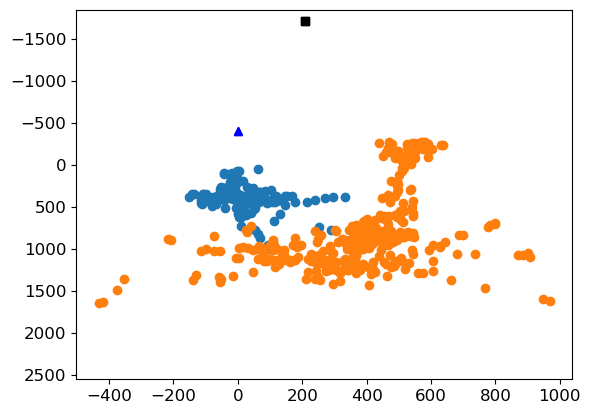

In [ ]:
# Add extracellular stim
for c, metype in enumerate(sim.net.cells):
    if "presyn" not in metype.tags["pop"]:
        print("\n", metype.tags)
        plt.plot(0, -400, "b^")
        plt.plot(acs_params["position"][0], acs_params["position"][1], "ks")
        secList = [
            secs for secs in metype.secs.keys() if "pt3d" in metype.secs[secs]["geom"]
        ]
        plt.plot(
            np.array(getSecsPos(metype, secList)[0]),
            -1 * np.array(getSecsPos(metype, secList)[1]),
            "o",
        )
        plt.ylim(2550, -1850)
        # print(np.array(getSecsPos(cell, secList)[0]).mean(axis=-1),-1*np.array(getSecsPos(cell, secList)[1]).mean(axis=-1),np.array(getSecsPos(cell, secList)[2]).mean(axis=-1))

Plotting LFP electrode locations...
Plotting 3D cell shape ...
Preparing LFP data...
Plotting LFP time series...


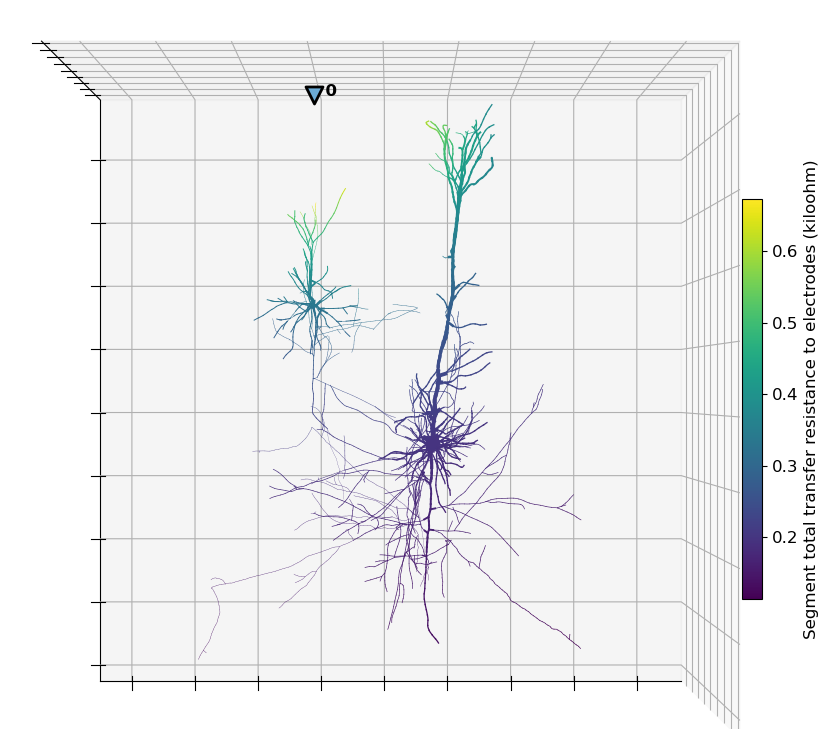

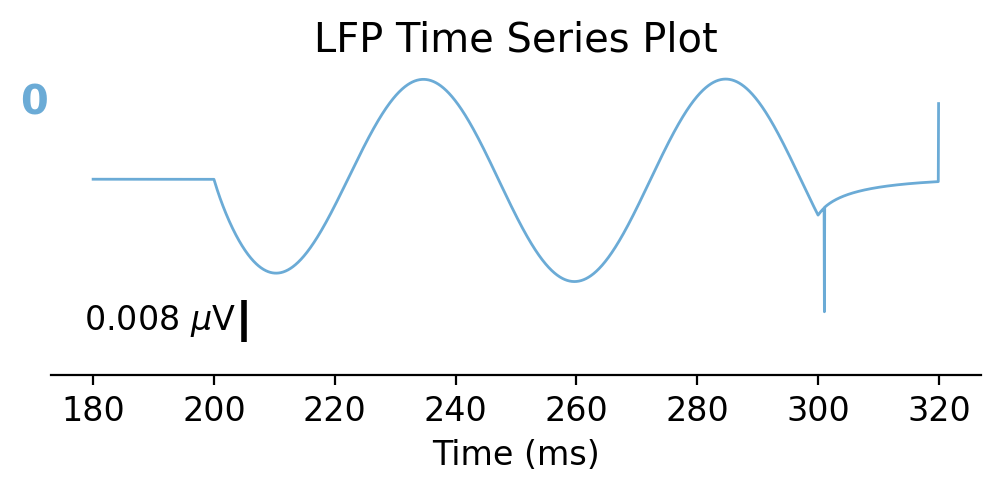

In [ ]:
sim.analysis.plotLFP(
    **{
        "plots": ["locations"],
        "figSize": (8, 8),
        "saveData": False,
        "saveFig": False,
        "showFig": False,
        "dpi": 100,
    }
)

sim.analysis.plotLFP(
    **{
        "plots": ["timeSeries"],
        "electrodes": [0],  #'avg',
        "timeRange": [180, cfg.duration],
        "figSize": (6, 2),
        "saveFig": False,
        "showFig": False,
    }
)

Plotting 3D cell shape ...


(<Figure size 640x480 with 2 Axes>, {})

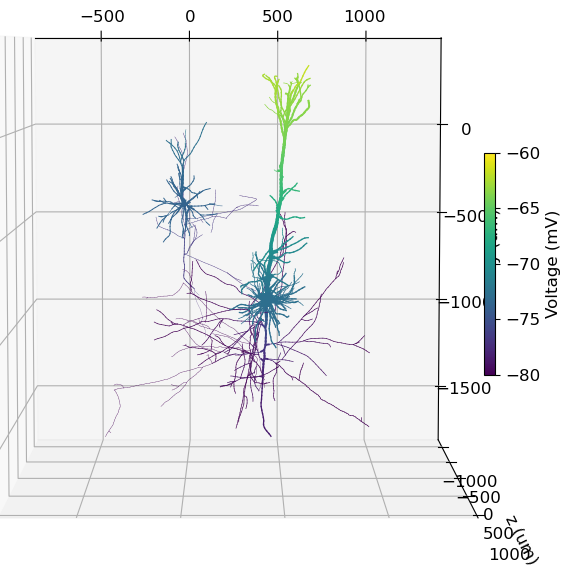

In [ ]:
sim.analysis.plotShape(
    includePre=["L23_PC", "L5_TTPC"],
    includePost=["L23_PC", "L5_TTPC"],
    includeAxon=True,
    showSyns=False,
    showElectrodes=False,
    cvar="voltage",
    dist=0.6,
    elev=95,
    azim=-90,
    axisLabels=True,
    synStyle="o",
    clim=[-80, -60],
    showFig=False,
    synSize=2,
)

Plotting recorded cell traces ... trace


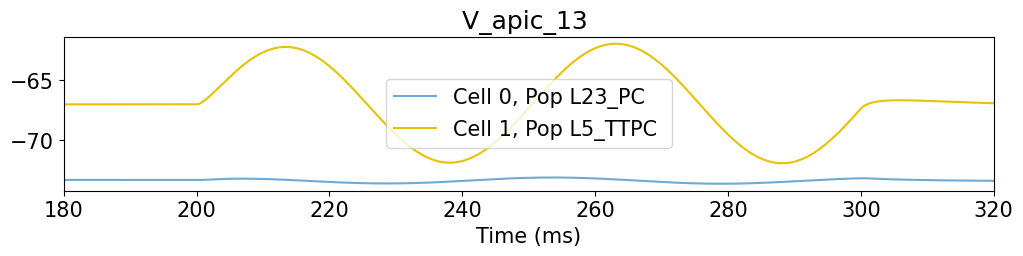

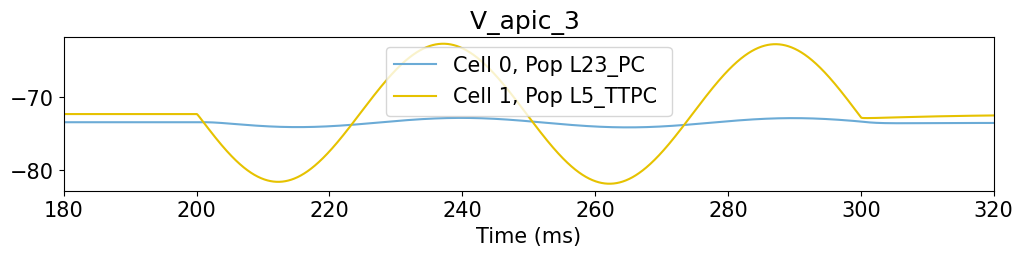

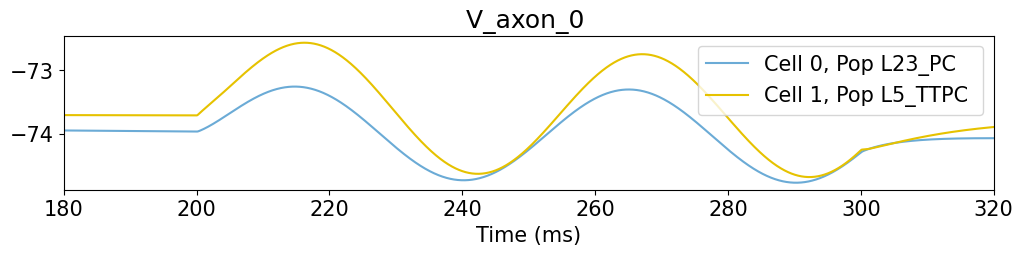

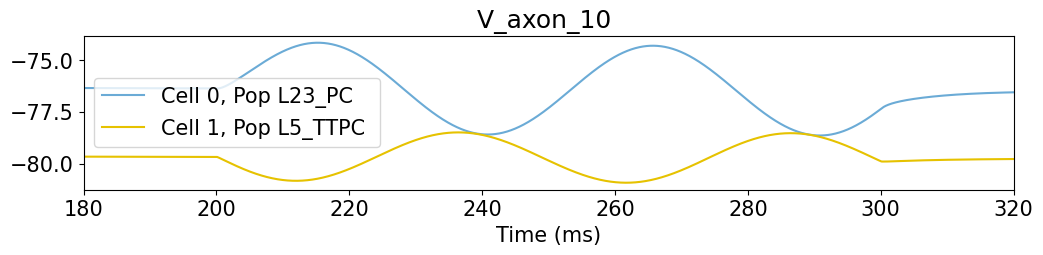

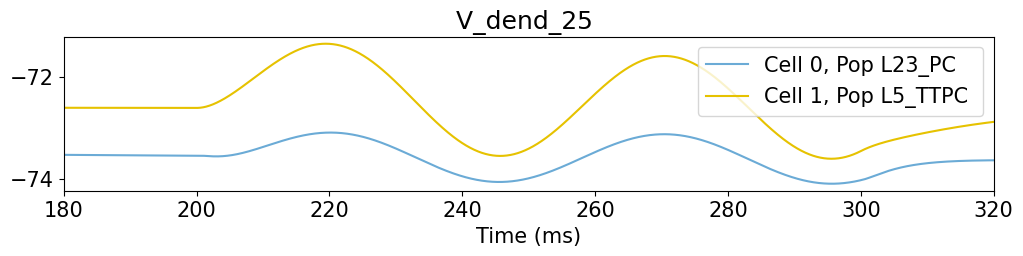

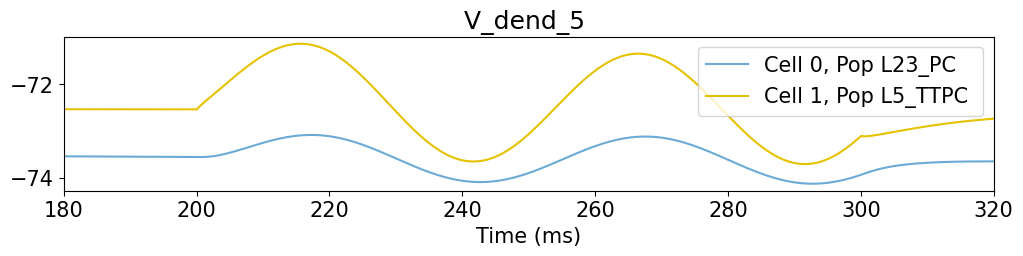

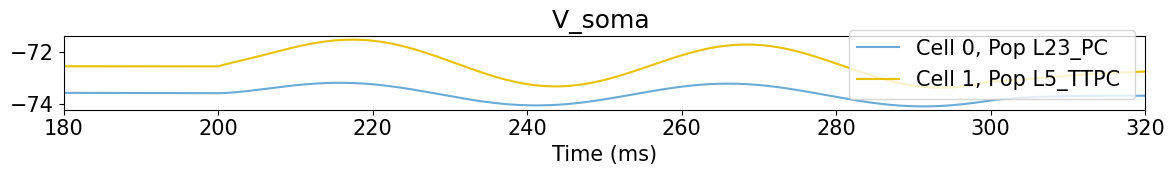

In [ ]:
sim.analysis.plotTraces(
    overlay=True,
    timeRange=[180, cfg.duration],
    oneFigPer="trace",
    figSize=(12, 2),
    fontSize=15,
    saveFig=False,
);

In [ ]:
# netParams.cellParams['L5_TTPC2_cADpyr232_1_rule']['secs']['dend_0']

In [ ]:
# for section in netParams.cellParams['L5_TTPC2_cADpyr232_1_rule']['secLists']['axonal']:
#     print(section,'->',netParams.cellParams['L5_TTPC2_cADpyr232_1_rule']['secs'][section]['topol']['parentSec'])

Plotting 2D representation of network cell locations and connections...


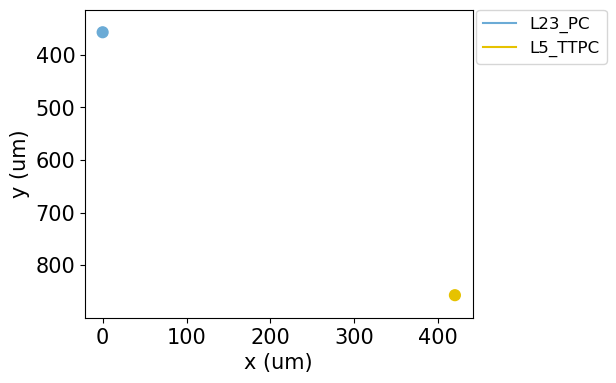

(<Figure size 500x400 with 1 Axes>,
 {'include': ['allCells'],
  'posX': [0, 420],
  'posY': [357, 857],
  'posXpre': [],
  'posXpost': [],
  'posYpre': [],
  'posYpost': []})

In [ ]:
sim.analysis.plot2Dnet(figSize=(5, 4), fontSize=12)